# Volume 4: Optimal Control as Boundary Value Problems
    <Name>
    <Class>
    <Date>

In [1]:
# Impot needed libraries
import numpy as np
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt

## Problem 1
Given the following cost functional and boundary conditions, solve for and plot the optimal path and acceleration.
\begin{align*}
    J(u) &= \int_0^{30} x^2 + \frac{2\pi}{5}u^2dt \\
    s(t) &= \begin{bmatrix}x(t)\\x'(t) \end{bmatrix}, s(0) = \begin{bmatrix}0\\1 \end{bmatrix}, \quad s(30) = \begin{bmatrix}16\\10 \end{bmatrix}
\end{align*}
Plot your solutions for the optimal $x(t)$ and $u(t)$.

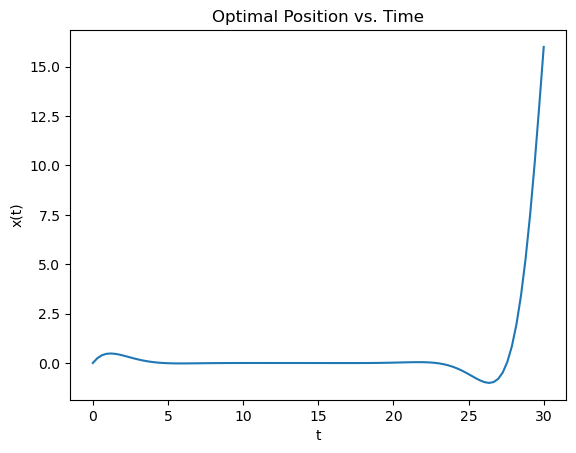

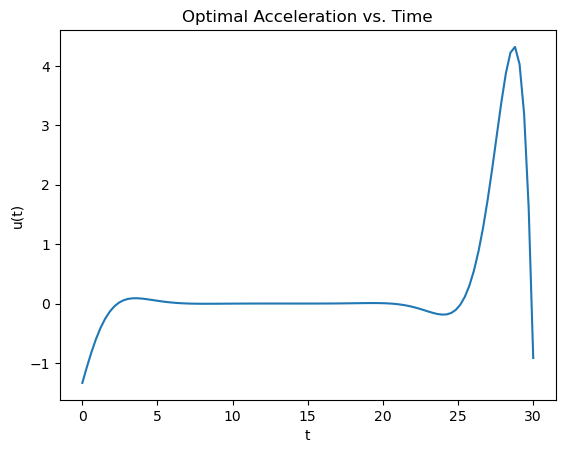

In [2]:
def prob1():
    '''
    Find the optimal path for the fixed time horizon problem
    '''    
    # Element 1: The ODE function
    def ode(t,y):
        '''defines the ode system'''
        
        return np.array([y[1], (5/(4*np.pi))*y[3], 2*y[0], -y[2]])
    
    # Element 2: The Boundary Condtions
    def bc(ya, yb):
        '''defines the boundary conditions'''
        #ya are the initial values
        #yb are the final values
        # each entry of the return array will be set to z
        return np.array([ya[0], ya[1] - 1, yb[0] - 16, yb[1] - 10])
    
    # Element 3: The Time Domain
    t_steps = 100
    t = np.linspace(0,30, t_steps)
    
    # Element 4: The Initial Guess
    y0 = np.ones((4, t_steps))
    
    # Solve the system
    sol = solve_bvp(ode, bc, x = t, y = y0)
    
    # Plot the solution
    plt.plot(sol.x, sol.y[0])
    plt.xlabel('t')
    plt.ylabel('x(t)')
    plt.title('Optimal Position vs. Time')
    plt.show()
    
    # Plot the solution
    plt.plot(sol.x, (5/(4*np.pi)) *sol.y[3])
    plt.xlabel('t')
    plt.ylabel('u(t)')
    plt.title('Optimal Acceleration vs. Time')
    plt.show()
    
prob1()
    

## Problem 2 
Using the ODEs found in 14.7 and 14.11, the obstacle function 14.8, and the following boundary conditions and parameters solve for and plot the optimal path.
\begin{align*}
    t_0 = 0 &, \quad t_f = 20\\
    (c_x,c_y) &= (4,1)\\
    (r_x,r_y) &= (5,.5)\\
    \lambda &= 20\\
    s_0 = \begin{bmatrix}6\\1.5\\0\\0 \end{bmatrix}&, \quad s_f = \begin{bmatrix}0\\0\\0\\0 \end{bmatrix}
\end{align*}
You will need to choose a $W_1$ and $W_2$ which allow the solver to find a valid path.
If these parameters are not chosen correctly, the solver may find a path which goes through the obstacle, not around it.
Plot the obstacle using plt.contour() to be certain path doesn't pass through the obstacle.

In [3]:
def obstacle(x,y,W1=1,r=(1,1),c=(0,0)):
    '''
    Define an area that will represent an obstacle
    
    Parameters:
        x (float): x position in space
        y (float): y position in space
        W1 (float): weight of cost
        r (tuple): radius in x and y direction
        c (tuple): center of the ellipse
    '''

    ellipse = ((x - c[0])**2/r[0] + (y - c[1])**2/r[1])**20 + 1

    return W1 / ellipse

def obstacle_dx(x,y,W1=1,r=(1,1,),c=(0,0)):
    '''
    x derivative of the obstacle

    Parameters:
        x (float): x position in space
        y (float): y position in space
        W (float): weight of cost
        r (tuple): radius in x and y direction
        c (tuple): center of the ellipse
    '''

    circle = (x - c[0])**2/r[0] + (y - c[1])**2/r[1]
    numer = -40* W1 * (x-c[0])*(circle)**19
    denom = r[0]*((circle)**20 + 1)**2

    return numer / denom

def obstacle_dy(x,y,W1=1,r=(1,1,),c=(0,0)):
    '''
    y derivative of the obstacle

    Parameters:
        x (float): x position in space
        y (float): y position in space
        W1 (float): weight of cost
        r (tuple): radius in x and y direction
        c (tuple): center of the ellipse
    '''

    circle = (x - c[0])**2/r[0] + (y - c[1])**2/r[1]
    numer = -40 * W1 * (y-c[1])*(circle)**19
    denom = r[1]*((circle)**20 + 1)**2

    return numer / denom

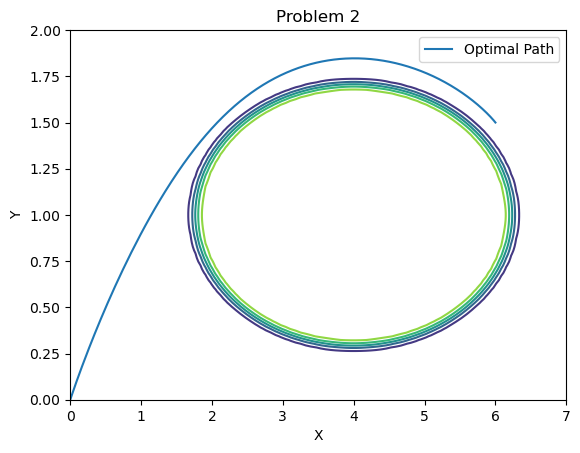

In [4]:
from functools import partial

def prob2():
    '''
    Find the optimal path for the fixed time horizon problem
    '''
    
    # Define the constants
    W_1 = 3
    W_2 = 70
    
    # Define the C functions
    C = partial(obstacle, W1 = W_1, r = (5,0.5), c = (4,1))
    C_dx = partial(obstacle_dx, W1 = W_1, r = (5,0.5), c = (4,1))
    C_dy = partial(obstacle_dy, W1 = W_1, r = (5,0.5), c = (4,1))
    
    # Element 1: The ODE Function
    def ode(t,y):
        '''defines the ode system'''
        
        return np.array([y[2],
                         y[3],
                         1/(2*W_2)*y[6],
                         1/(2*W_2)*y[7],
                         C_dx(y[0],y[1]),
                         C_dy(y[0],y[1]),
                         -y[4],
                            -y[5]])
        
    # Element 2: The boundary conditions
    def bc(ya, yb):
        '''defines the boundary conditions'''
        return np.array([ya[0] - 6, ya[1] - 1.5 , ya[2], ya[3], yb[0], yb[1], yb[2], yb[3]])
    
    # Element 3: The Time Domain
    t_steps = 100
    t = np.linspace(0,20, t_steps)
    
    # Element 4: The Initial Guess
    y0 = np.ones((8, t_steps))
    
    # Solve the system
    sol = solve_bvp(ode, bc, x = t, y = y0, max_nodes = 30_000)
    
    # Get the X and Y values
    X = sol.y[0]
    Y = sol.y[1]
    
    # Construct meshgrid for contour plot
    X_lin = np.linspace(0,7,100)
    Y_lin = np.linspace(0,2,100)
    X_mesh, Y_mesh = np.meshgrid(X_lin,Y_lin)
    
    # Plot the Optimal Path and the Obstacle
    plt.plot(X,Y, label = 'Optimal Path')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Problem 2')
    plt.contour(X_mesh,Y_mesh, C(X_mesh,Y_mesh), levels = 5, cmap = 'viridis')
    plt.xlim(0,7)
    plt.ylim(0,2)
    plt.legend()
    plt.show()
    
prob2()
        
        
        
        
        
        
        
        
    

## Problem 3
Solve the following boundary value problem:
\begin{align*}
    y'' + 3y &= \sin(t)\\
    y(0) = 0,\quad y(t_f) = &\frac{\pi}{2}, \quad y'(t_f) = \frac{1}{2}\left(\sqrt{3}\pi \cot(\pi\sqrt{75}) - 1 \right).
\end{align*}
Plot your solution. What $t_f$ did the solver find?

15.707964683316126


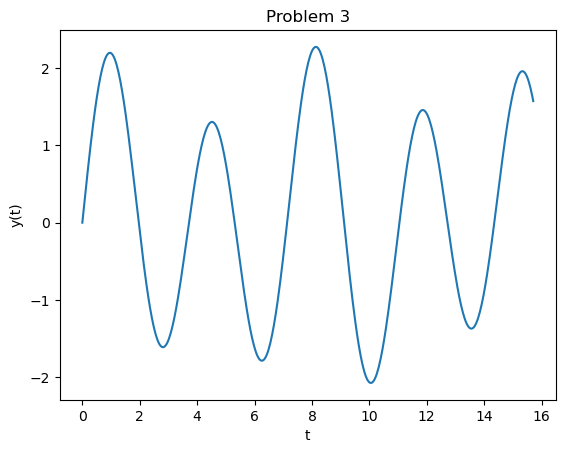

In [7]:
def prob3():
    '''
    Solve the free time horizon BVP.
    Plot the solution and return the correct end time
    '''
    
    # Define the ODE function
    def ode(t,y,p):
        ''' define the ode system'''
        return p[0] * np.array([y[1], np.sin(p[0] * t) - 3 * y[0]])
       
    # Define the boundary conditions function                 
    def bc(ya, yb,p):
        ''' define the boundary conditions'''
        condition = (1/2) * (np.sqrt(3) * np.pi * 1/(np.tan(np.pi * np.sqrt(75))) - 1)
        return np.array([ya[0], yb[0] - np.pi/2, yb[1] - condition ])
        
    # Define the time domain
    t_steps = 500
    t = np.linspace(0,1, t_steps)
    
    # Give an initial guess
    y0 = np.ones((2,t_steps))
    p0 = np.array([5*np.pi])
    
    # Solve the system
    sol = solve_bvp(ode, bc, t, y0, p0)
    print(sol.p[0])
    
    # Plot the solution
    plt.plot(sol.p[0]*t, sol.sol(t)[0])
    plt.xlabel('t')
    plt.ylabel('y(t)')
    plt.title('Problem 3')
    plt.show()
    
prob3()

## Problem 4
Refactor your code from Problem 2 to create a free end time BVP and use a new boundary value derived from 

$H(t_f,p(t_f),s(t_f),u(t_f)) = 0.$

Let $W_1 = 4$ and $W_2 = 0.1$, and use $6$ as the initial guess for p(0).
Plot the solution you found.
What is the optimal time?

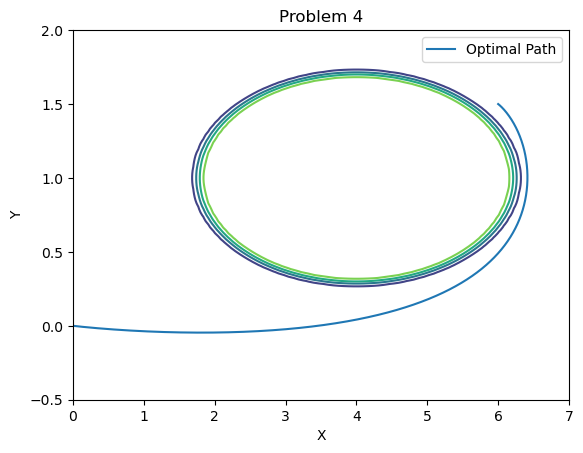

4.466959853822109


In [17]:
def prob4():
    '''
    Find the optimal path for the fixed time horizon problem
    '''
    W_1 = 4
    W_2 = 0.1
    
    C = partial(obstacle, W1 = W_1, r = (5,0.5), c = (4,1))
    C_dx = partial(obstacle_dx, W1 = W_1, r = (5,0.5), c = (4,1))
    C_dy = partial(obstacle_dy, W1 = W_1, r = (5,0.5), c = (4,1))
    
    # Element 1: The ODE Function
    def ode(t,y, p):
        '''defines the ode system'''
        
        return p[0] * np.array([y[2],
                         y[3],
                         1/(2*W_2)*y[6],
                         1/(2*W_2)*y[7],
                         C_dx(y[0],y[1]),
                         C_dy(y[0],y[1]),
                         -y[4],
                            -y[5]])
        
    # Element 2: The boundary conditions
    def bc(ya, yb, p):
        '''defines the boundary conditions'''
    
        last_condition = yb[4]*yb[2] + yb[5]*yb[3] + yb[6]* (1/(2*W_2))*yb[6] + yb[7]* (1/(2*W_2))*yb[7] - (1 + C(yb[0],yb[1]) + W_2*(((1/(2*W_2))*yb[6])**2 + ((1/(2*W_2))*yb[7])**2))

        
        return np.array([ya[0] - 6, ya[1] - 1.5 , ya[2], ya[3], yb[0], yb[1], yb[2], yb[3], last_condition])
    
    # Element 3: The Time Domain
    t_steps = 200
    t = np.linspace(0,1, t_steps)
    
    # Element 4: The Initial Guess
    y0 = np.ones((8, t_steps))
    p0 = np.array([6])
    
    # Solve the system
    sol = solve_bvp(ode, bc, t, y0, p0, max_nodes = 60_000)
    
    # Get the X and Y components of the solution
    X = sol.y[0]
    Y = sol.y[1]
    
    # Construct the meshgrid for the contour plot
    X_lin = np.linspace(0,7,100)
    Y_lin = np.linspace(0,2,100)
    X_mesh, Y_mesh = np.meshgrid(X_lin,Y_lin)
    
    # Plot data
    plt.plot(X,Y, label = 'Optimal Path')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Problem 4')
    plt.contour(X_mesh,Y_mesh, C(X_mesh,Y_mesh), levels = 5, cmap = 'viridis')
    plt.xlim(0,7)
    plt.ylim(-0.5,2)
    plt.legend()
    plt.show()
    
    print(-1 * sol.p[0]*t[-1])
    
prob4()
    